# Модель Ridge-регрессии

In [151]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#Генерация данных для тестирования
n_features = 700
n_objects = 100000

w_true = np.random.uniform(-2, 2, (n_features, 1))

X = np.random.uniform(-100, 100, (n_objects, n_features)) * np.arange(n_features)
Y = X.dot(w_true) + np.random.normal(0, 10, (n_objects, 1))

In [152]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

batch_size = 25

class ourRidge(BaseEstimator, RegressorMixin):
    
    def __init__(self, batch_size=25, num_steps=350, lr=1e-2, a=1.0):
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr
        self.a = a

    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)

        for i in range(self.num_steps):
            sample_indices = np.random.randint(0, n_objects, size=batch_size)
            w -= 2 * self.lr * (np.dot(X[sample_indices].T, np.dot(X[sample_indices], w) - Y[sample_indices]) / self.batch_size + self.a * w/ n_objects)

        self.w = w
        return self

    def predict(self, X):
        return X@self.w

In [153]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [154]:
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [155]:
own_model = ourRidge().fit(x_scaled, y_train)
y_pred = own_model.predict(x_test_scaled)
own_r2 = r2_score(y_test, y_pred)

sklearn_model = Ridge().fit(x_scaled, y_train)
y_pred = sklearn_model.predict(x_test_scaled)
sklearn_r2 = r2_score(y_test, y_pred)

print('R^2 in own model:', own_r2)
print('R^2 in sklearn loss:', sklearn_r2)

R^2 in own model: 0.9999473982384941
R^2 in sklearn loss: 0.9999999996270351


# Логистическая регрессия

In [156]:
class LogReg(BaseEstimator, RegressorMixin):
    def __init__(self, batch_size=75, num_steps=10000, lr=1e-2):
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)
        for i in range(self.num_steps):
            sample_indices = np.random.randint(0, n_objects, size=self.batch_size)
            w -= self.lr * (X[sample_indices].T @ (self.sigmoid(X[sample_indices] @ w) - Y[sample_indices]) / self.batch_size)

        self.w = w
        return self

    def predict(self, X):
        return self.sigmoid(X @ self.w) >= 0.5

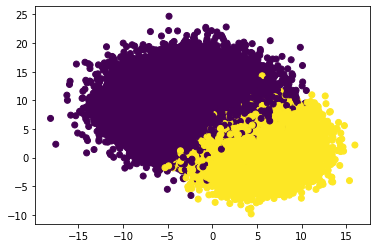

In [171]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

x, y = make_blobs(n_samples=100000, centers= 2, cluster_std=[3.5, 2.7], random_state=42)

plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

In [172]:
y = y.reshape(samples, 1)
w_true = np.random.uniform(-2, 2, (n_features, 1))
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [173]:
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [174]:
own_model = LogReg().fit(x_scaled, y_train)
y_pred = own_model.predict(x_test_scaled)
own_r2 = r2_score(y_test, y_pred)

sklearn_model = LogisticRegression().fit(x_scaled, y_train)
y_pred = sklearn_model.predict(x_test_scaled)
sklearn_r2 = r2_score(y_test, y_pred)

print('R^2 in own model:', own_r2)
print('R^2 in sklearn loss:', sklearn_r2)


R^2 in own model: 0.7905599946383359
R^2 in sklearn loss: 0.8004799948922878


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

